In [ ]:
# Setup the execution environment

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%cd /home/super/source/finance_scrapy
# %pwd

/home/super/source/finance_scrapy


In [ ]:
"""This cell defineds the plot_candles function"""
"""https://www.quantopian.com/posts/plot-candlestick-charts-in-research"""

def plot_candles_v1(pricing, title=None, 
                    volume_bars=False, 
                    color_function=None, 
                    technicals=None):
    """ Plots a candlestick chart using quantopian pricing data.
    
    Author: Daniel Treiman
    
    Args:
      pricing: A pandas dataframe with columns ['open', 'close', 'high', 'low', 'volume']
      title: An optional title for the chart
      volume_bars: If True, plots volume bars
      color_function: A function which, given a row index and price series, returns a candle color.
      technicals: A list of additional data series to add to the chart.  Must be the same length as pricing.
    """
    def default_color(index, open_price, close_price, low_price, high_price):
        return 'r' if open_price[index] > close_price[index] else 'g'
    
    color_function = color_function or default_color
    technicals = technicals or []
    open_price = pricing['open']
    close_price = pricing['close']
    low_price = pricing['low']
    high_price = pricing['high']
    oc = pd.concat([open_price, close_price], axis=1)
    oc_min = oc.min(axis=1)
    oc_max = oc.max(axis=1)

    if volume_bars:
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3,1]})
    else:
        fig, ax1 = plt.subplots(1, 1)
    if title:
        ax1.set_title(title)

    x = np.arange(len(pricing))
    candle_colors = [color_function(i, open_price, close_price, low_price, high_price) for i in x]
    candles = ax1.bar(x, oc_max-oc_min, bottom=oc_min, color=candle_colors, linewidth=0)
    lines = ax1.vlines(x + 0.4, low_price, high_price, color=candle_colors, linewidth=1)
    ax1.xaxis.grid(False)
    ax1.xaxis.set_tick_params(which='major', length=3.0, direction='in', top='off')
    # Assume minute frequency if first two bars are in the same day.
    frequency = 'minute' if (pricing.index[1] - pricing.index[0]).days == 0 else 'day'
    time_format = '%Y-%m-%d'
    if frequency == 'minute':
        time_format = '%H:%M'
    # Set X axis tick labels.
# type(pricing.index): <class 'pandas.tseries.index.DatetimeIndex'>
# type(pricing.index[0]): <class 'pandas.tslib.Timestamp'>
# Only mark the xtick of Monday
    [x_tick, x_tick_lable] = zip(*[(x[index], date.strftime(time_format)) for index, date in enumerate(pricing.index) if date.weekday() == 0])
    plt.xticks(x_tick, x_tick_lable, rotation='vertical')
#     plt.xticks(x, [date.strftime(time_format) for date in pricing.index], rotation='vertical')
    for indicator in technicals:
        ax1.plot(x, indicator)
    
    if volume_bars:
        volume = pricing['volume']
        volume_scale = None
        scaled_volume = volume
        if volume.max() > 1000000:
            volume_scale = 'M'
            scaled_volume = volume / 1000000
        elif volume.max() > 1000:
            volume_scale = 'K'
            scaled_volume = volume / 1000
        ax2.bar(x, scaled_volume, color=candle_colors)
        volume_title = 'Volume'
        if volume_scale:
            volume_title = 'Volume (%s)' % volume_scale
        ax2.set_title(volume_title)
        ax2.xaxis.grid(False)


def plot_candles_v2(pricing, title=None,
                 volume_bars=False,
                 color_function=None,
                 overlays=None,
                 technicals=None,
                 technicals_titles=None):
    """ Plots a candlestick chart using quantopian pricing data.
    
    Author: Daniel Treiman
    
    Args:
      pricing: A pandas dataframe with columns ['open_price', 'close_price', 'high', 'low', 'volume']
      title: An optional title for the chart
      volume_bars: If True, plots volume bars
      color_function: A function which, given a row index and price series, returns a candle color.
      overlays: A list of additional data series to overlay on top of pricing.  Must be the same length as pricing.
      technicals: A list of additional data series to display as subplots.
      technicals_titles: A list of titles to display for each technical indicator.
    """
    def default_color(index, open_price, close_price, low, high):
        return 'r' if open_price[index] > close_price[index] else 'g'
    color_function = color_function or default_color
    overlays = overlays or []
    technicals = technicals or []
    technicals_titles = technicals_titles or []
    open_price = pricing['open']
    close_price = pricing['close']
    low_price = pricing['low']
    high_price = pricing['high']
    oc = pd.concat([open_price, close_price], axis=1)
    oc_min = oc.min(axis=1)
    oc_max = oc.max(axis=1)
    
    subplot_count = 1
    if volume_bars:
        subplot_count = 2
    if technicals:
        subplot_count += len(technicals)
    
    if subplot_count == 1:
        fig, ax1 = plt.subplots(1, 1)
    else:
        ratios = np.insert(np.full(subplot_count - 1, 1), 0, 3)
        fig, subplots = plt.subplots(subplot_count, 1, sharex=True, gridspec_kw={'height_ratios': ratios})
        ax1 = subplots[0]
        
    if title:
        ax1.set_title(title)
    x = np.arange(len(pricing))
    candle_colors = [color_function(i, open_price, close_price, low_price, high_price) for i in x]
    candles = ax1.bar(x, oc_max-oc_min, bottom=oc_min, color=candle_colors, linewidth=0)
    lines = ax1.vlines(x + 0.4, low_price, high_price, color=candle_colors, linewidth=1)
    ax1.xaxis.grid(False)
    ax1.xaxis.set_tick_params(which='major', length=3.0, direction='in', top='off')
    # Assume minute frequency if first two bars are in the same day.
    frequency = 'minute' if (pricing.index[1] - pricing.index[0]).days == 0 else 'day'
    time_format = '%Y-%m-%d'
    if frequency == 'minute':
        time_format = '%H:%M'
    # Set X axis tick labels.
# type(pricing.index): <class 'pandas.tseries.index.DatetimeIndex'>
# type(pricing.index[0]): <class 'pandas.tslib.Timestamp'>
# Only mark the xtick of Monday
    [x_tick, x_tick_lable] = zip(*[(x[index], date.strftime(time_format)) for index, date in enumerate(pricing.index) if date.weekday() == 0])
    plt.xticks(x_tick, x_tick_lable, rotation='vertical')
#     plt.xticks(x, [date.strftime(time_format) for date in pricing.index], rotation='vertical')
    for overlay in overlays:
        ax1.plot(x, overlay)
    # Plot volume bars if needed
    if volume_bars:
        ax2 = subplots[1]
        volume = pricing['volume']
        volume_scale = None
        scaled_volume = volume
        if volume.max() > 1000000:
            volume_scale = 'M'
            scaled_volume = volume / 1000000
        elif volume.max() > 1000:
            volume_scale = 'K'
            scaled_volume = volume / 1000
        ax2.bar(x, scaled_volume, color=candle_colors)
        volume_title = 'Volume'
        if volume_scale:
            volume_title = 'Volume (%s)' % volume_scale
        ax2.set_title(volume_title)
        ax2.xaxis.grid(False)
    # Plot additional technical indicators
    for (i, technical) in enumerate(technicals):
        ax = subplots[i - len(technicals)] # Technical indicator plots are shown last
        ax.plot(x, technical)
        if i < len(technicals_titles):
            ax.set_title(technicals_titles[i])

plot_candles = plot_candles_v2

In [2]:
%run finance_analysis.py -v
# df.rename(columns={'0903': 'open', '0904': 'high', '0905': 'low', '0906': 'close', '0908': 'volume'}, inplace=True)
# df.head()

True


RuntimeError: Global variables have already been UPDATED !!!

In [1]:
open_price = df['open']
close_price = df['close']

# data = pd.concat([open_price, close_price], axis=1)
# data_min = data.min(axis=1)

x = np.arange(len(df))
time_format = '%Y-%m-%d'
x_tick_list = [(x[index], date.strftime(time_format)) for index, date in enumerate(df.index) if date.weekday() == 0]
print type(df.index)
print type(df.index[0])
# x_tick_list = [(date.weekday, date.strftime(time_format)) for index, date in enumerate(df.index)]

# x_tick_list
# oc_min = pd.concat([open_price, close_price], axis=1).min(axis=1)
# oc_max = pd.concat([open_price, close_price], axis=1).max(axis=1)

NameError: name 'df' is not defined

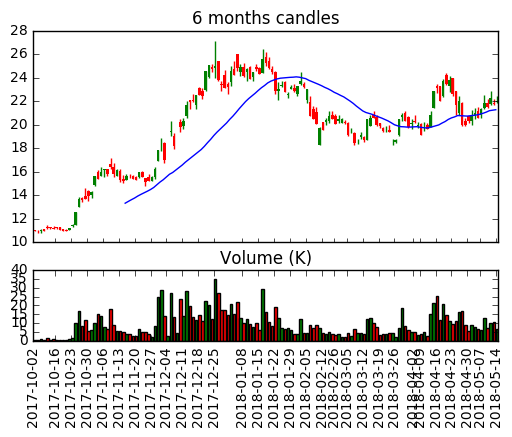

In [41]:
import talib
SMA = talib.SMA(df['close'].as_matrix())

plot_candles(df, title='6 months candles', volume_bars=True, overlays=[SMA])

In [7]:
df.head()
df_drop = df.drop('0005',axis=1)
df_drop.head()
df_drop.iloc[0:5]

,0703,0704,0707,0708,0712,0713,0716,0717
date,,,,,,,,
2014-01-02,32221,49.0,30893,47.0,33316,44.2,31688,42.0
2014-01-03,29668,45.2,31555,48.1,31168,40.8,33085,43.3
2014-01-06,28050,43.8,29830,46.5,30103,39.7,32094,42.3
2014-01-07,28801,44.2,30396,46.6,30487,38.7,33928,43.1
2014-01-08,27142,43.0,29973,47.5,29089,37.3,33859,43.4


In [51]:
type(df_drop.iloc[0:3].sum())

pandas.core.series.Series

In [68]:
def accumulate(df, accumulate_cnt):
#     accumulate_cnt = 3
    start_index = accumulate_cnt - 1
    cur_index = start_index 
    accumulate_df = pd.DataFrame(index=df.index[start_index:], columns=df.columns)
    for index in range(len(accumulate_df)):
        accumulate_df.iloc[index] = df.iloc[index:index+accumulate_cnt].sum()
    accumulate_df
    return accumulate_df
accumulate_cnt = 20
accumulate_df = accumulate(df.drop('0005',axis=1), accumulate_cnt)
accumulate_df['0005'] = df['0005'].iloc[accumulate_cnt-1:]
accumulate_df.head()
# accumulate_cnt = 3
# cur_index = accumulate_cnt
# for index, row in df_drop[accumulate_cnt:].iterrows():
#     accumulate_sum = df[cur_index:cur_index+accumulate_cnt].sum()
#     print(index, accumulate_sum['0005'])
#     cur_index += 1

,0103,0106,0109,0112,total,0005
date,,,,,,
2014-12-26,1909108636,1843429221,-6927044009,-57354364694,-60528870846,55.37
2014-12-27,1991152806,2214395353,-7036829143,-52138430707,-54969711691,4.43
2014-12-29,2211624712,4084193265,-4927808876,-33119737182,-31751728081,67.78
2014-12-30,1409485515,145379469,-4840746820,-29815171225,-33101053061,-17.85
2014-12-31,1338871606,-1622033707,-6009633901,-35009619808,-41302415810,38.83


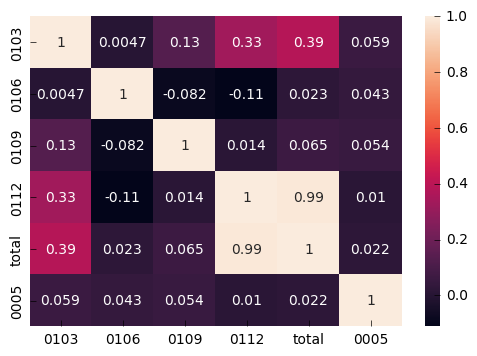

In [69]:
sns.heatmap(accumulate_df.corr(), annot=True)

In [48]:
df_copy = df.copy()
df_copy.reset_index(inplace=True)
df_copy.head()
df_open = df_copy[['date','open']].copy().set_index('open')
df_open['type'] = "O"
df_high = df_copy[['date','high']].copy().set_index('high')
df_high['type'] = "H"
df_low = df_copy[['date','low']].copy().set_index('low')
df_low['type'] = "L"
df_close = df_copy[['date','close']].copy().set_index('close')
df_close['type'] = "C"
df_total_value = pd.concat([df_open, df_high, df_low, df_close])
df_total_value.sort_index()


,date,type
10.75,2017-10-05,L
10.80,2017-10-03,L
10.90,2017-10-02,C
10.90,2017-10-05,O
10.90,2017-10-18,L
10.90,2017-10-06,L
10.90,2017-10-02,L
10.90,2017-10-03,C
10.95,2017-10-03,O
10.95,2017-10-19,L


In [93]:
def sort_price_statistics(df, price_range_low=None, price_range_high=None):
    df_copy = df.copy()
    # df_copy.sort_index(ascending=True)
    df_copy.reset_index(inplace=True)
    df_copy.head()
    df_open = (df_copy[['date','open']].copy())
    df_open['type'] = "O"
    df_open.rename(columns={'open': 'price'}, inplace=True)
    df_high = df_copy[['date','high']].copy()
    df_high['type'] = "H"
    df_high.rename(columns={'high': 'price'}, inplace=True)
    df_low = df_copy[['date','low']].copy()
    df_low['type'] = "L"
    df_low.rename(columns={'low': 'price'}, inplace=True)
    df_close = df_copy[['date','close']].copy()
    df_close['type'] = "C"
    df_close.rename(columns={'close': 'price'}, inplace=True)
    df_total_value = pd.concat([df_open, df_high, df_low, df_close])
# Display the price in range
    if price_range_low is not None:
        df_total_value = df_total_value[df_total_value['price'] >= price_range_low]
    if price_range_high is not None:
        df_total_value = df_total_value[df_total_value['price'] <= price_range_high]
        
#     df_total_value.sort_values("price", ascending=True, inplace=True)
    prices = df_total_value.groupby('price')

    return prices


def display_price_statistics(df, cur_price):
    prices = sort_price_statistics(df, cur_price - 3, cur_price + 3)
    cur_price_print = False
    for price, df_data in prices:
        data_str = ",".join([row['date'].strftime("%y%m%d")+row['type'] for index, row in df_data.iterrows()])    
        if not cur_price_print and cur_price < price:
            print "\033[1;31;47m" + "CUR: %f" % cur_price
            cur_price_print = True
        print "\033[1;30;47m" + "Price: %f, Data: %s" % (price,data_str)



In [94]:
# for price, df_data in prices:
#     data_str = ",".join([row['date'].strftime("%y%m%d")+row['type'] for index, row in df_data.iterrows()])    
#     print "Price: %f, Data: %s" % (price,data_str)
display_price_statistics(df, 21.9)

Price: 18.900000, Data: 171130H
Price: 18.950000, Data: 180309O,180312O
Price: 19.000000, Data: 171206O,180312H,171205L
Price: 19.050000, Data: 180305L,180327L
Price: 19.100000, Data: 180327O,180409L,180305C,180309C,180409C
Price: 19.250000, Data: 171206H
Price: 19.300000, Data: 180307O,180306L
Price: 19.350000, Data: 180309H,171208L,180321L
Price: 19.400000, Data: 171205O,180306O,180307H,180320L,180322L,180306C,180322C
Price: 19.450000, Data: 180410L,180320C
Price: 19.500000, Data: 180321O,171205C,180321C
Price: 19.550000, Data: 180322O,180212L,180212C
Price: 19.600000, Data: 180410O
Price: 19.650000, Data: 171211L,180331L,180411L,180410C,180411C
Price: 19.700000, Data: 180306H,180319L,180330L,180403L,180209C
Price: 19.750000, Data: 180320O
Price: 19.800000, Data: 180412O,180209H,180320H,180412L,171208C,180330C
Price: 19.850000, Data: 180321H,180314L,180426L,180427L,180319C
Price: 19.900000, Data: 171211O,180314O,180403O,180316L
Price: 19.950000, Data: 171207O,180411O,171207H,171207L,